# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# Import Data

In [3]:
# importing data
df = pd.read_csv(r'/Users/madelinegamache/Documents/Achievement 6/kc_clean.csv', index_col = False)

In [4]:
# check output
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [5]:
# dropping 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.shape

(20939, 22)

In [7]:
# creating subset and removing categorical data from data set
kc = df.drop(['waterfront', 'view', 'year', 'month', 'day'],axis=1)

In [8]:
# Check output
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# The Elbow Technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(kc).score(kc) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

[-2708325865444581.5,
 -1239528220450853.0,
 -650116819906200.6,
 -404383842959664.0,
 -273889183232234.12,
 -208079203385899.9,
 -159532744856947.12,
 -126561454032230.42,
 -103313285390630.9]

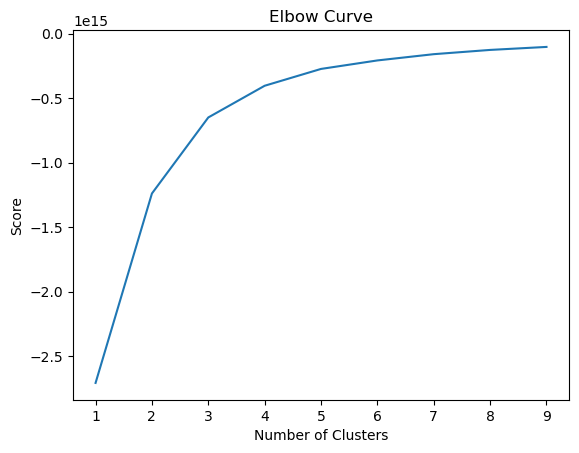

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The largest jump is from 2 to 3, however the curve does not begin to smooth out until after 4. Therefore I think 4 clusters will best represent the data.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(kc)

/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
kc['clusters'] = kmeans.fit_predict(kc)

/Users/madelinegamache/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [16]:
kc['clusters'].value_counts()

2    12560
0     7029
3     1162
1      188
Name: clusters, dtype: int64

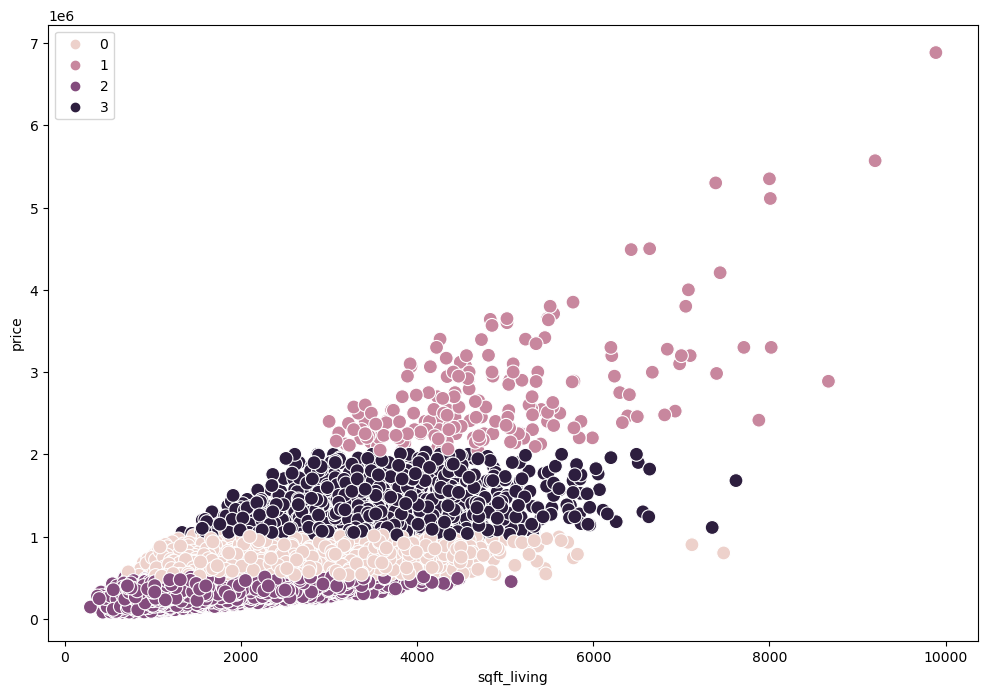

In [17]:
# Plot the clusters for the "sqft_living" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc['sqft_living'], y=kc['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('sqft_living')
plt.ylabel('price') 
plt.show()

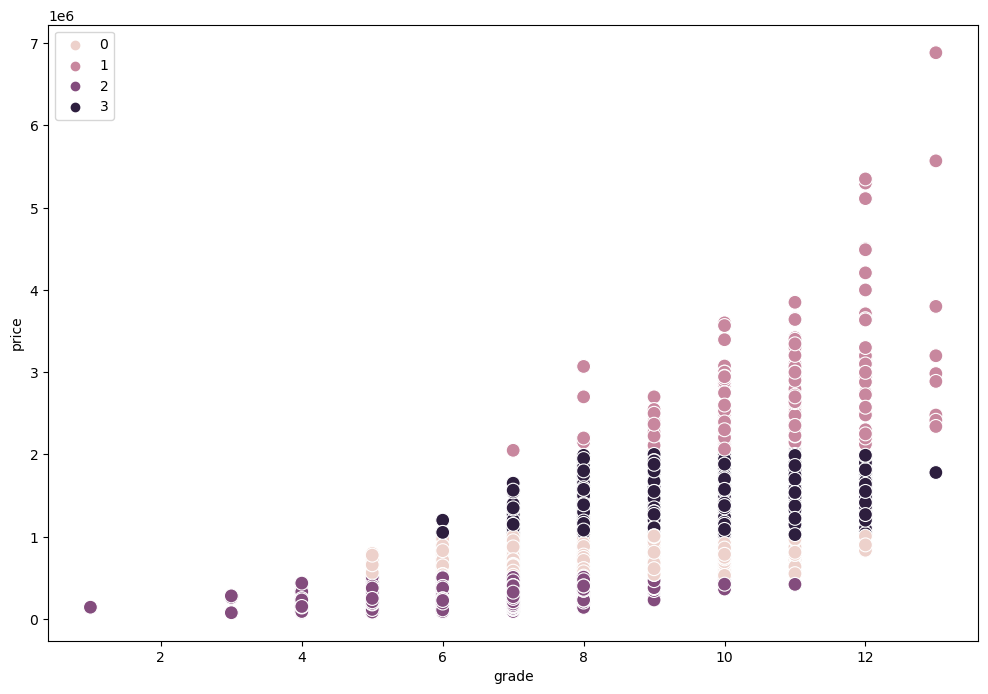

In [18]:
# Plot the clusters for the "grade" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc['grade'], y=kc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('grade') 
plt.ylabel('price') 
plt.show()

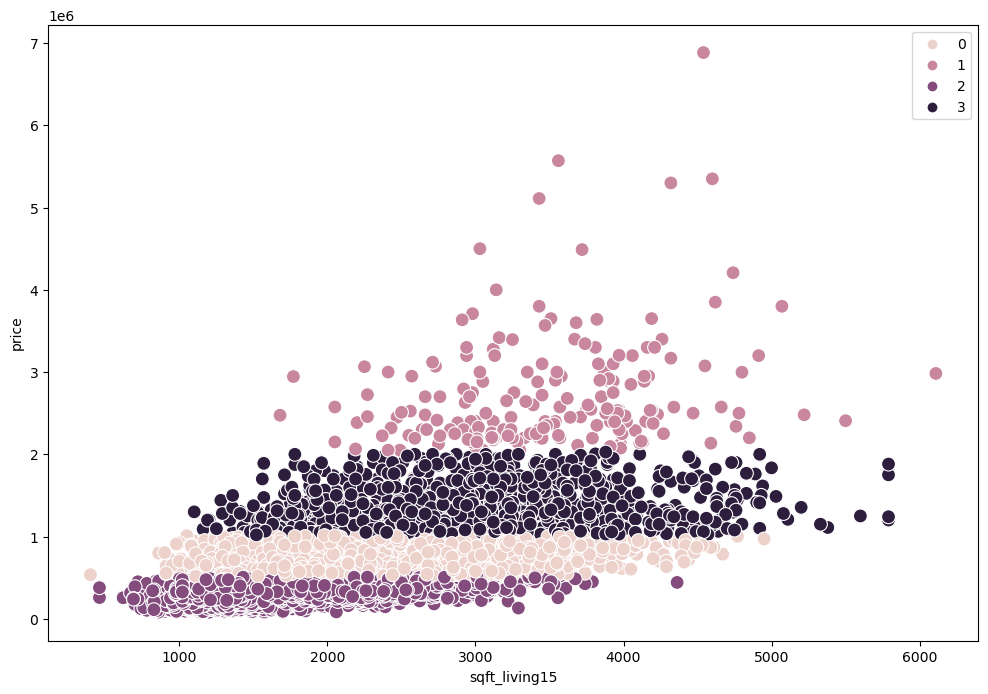

In [19]:
# Plot the clusters for the "sqft_living15" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=kc['sqft_living15'], y=kc['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('sqft_living15') 
plt.ylabel('price') 
plt.show()

In [20]:
kc.loc[kc['clusters'] == 3, 'cluster'] = 'dark purple'
kc.loc[kc['clusters'] == 2, 'cluster'] = 'purple'
kc.loc[kc['clusters'] == 1, 'cluster'] = 'pink'
kc.loc[kc['clusters'] == 0, 'cluster'] = 'light pink'

In [21]:
kc.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'grade':['mean', 'median'], 
                          'sqft_living15':['mean', 'median'],
                          'price':['mean','median', 'max', 'min']})

sqft_living              grade        sqft_living15          \
                    mean  median       mean median          mean  median   
cluster                                                                    
dark purple  3555.470740  3480.0   9.579174   10.0   2985.561102  2930.0   
light pink   2422.980083  2370.0   8.160051    8.0   2253.496799  2170.0   
pink         4912.547872  4665.0  10.675532   11.0   3487.196809  3450.0   
purple       1667.748806  1600.0   7.120064    7.0   1696.467596  1620.0   

                    price                                   
                     mean     median        max        min  
cluster                                                     
dark purple  1.350173e+06  1288000.0  2027000.0  1020000.0  
light pink   6.857306e+05   655500.0  1017100.0   514000.0  
pink         2.733012e+06  2500000.0  6885000.0  2048000.0  
purple       3.428522e+05   342000.0   514000.0    75000.0

# Observations

It appears that the clusters are grouped together based on price values of each houses sale price. Cluster 0 (light pink) represents houses priced 514,000 & 1,017,100 and has 7029 data points. Cluster 1 (pink) represents the highest priced houses between  2,048,000  & 6,885,000 with the least amount of data points at 188. Cluster 2 (purple) represents the lowest priced houses between 75,000 & 514,000 and has the most data points at 12560. Cluster 3 (dark purple) represents houses priced between 1,020,000 & 2,027,000 and has 1062 data points.

Plot 1 shows that houses with more square footage of living space will typically be priced higher.

Plot 2 shows that there are no houses in cluster 1 that rate below a grade 7 and houses in cluster 2 are the only houses to rate below a grade 4. This makes sense when cluster 1 represents the most expensive houses and cluster 2 represents the lowest priced houses. 

Plot 3 also does a good job of showing that the the larger the average square footage of living space from the closest 15 neighbors will typically reflect a higher price. However this relationship does not appear to be as strong as there is a large spread of data points of all clusters across the x-axis.

# Propose what these results could be useful for in future steps of an analytics pipeline.

The k-means clustering showed some interesting insights that can help further confirm which variables have an influence on the price for a house in King County, WA. Now that we have uncovered some common trends and patterns we can move to evaluating and validating these models to gain further insights.